# <font color=Red>1) Reading the dataset as a raw text file</font> 

In [1]:
# Read in the raw text
rawData = open("SMSSpamCollection").read()

# Print the raw data
rawData[0:500]

"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tU dun say so early hor... U c already then say...\nham\tNah I don't think he goes to usf, he lives around here though\nspam\tFreeMsg Hey there darling it's been 3 week's now and no word bac"

### <font color=blue>Splitting the dataset based on '\t' and '\n'</font>

In [2]:
parsedData = rawData.replace('\t', '\n').split('\n')
parsedData[0:5]

['ham',
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham',
 'Ok lar... Joking wif u oni...',
 'spam']

### <font color=blue>Creating two separate lists from the original - parseData[start:end:hops</font><font color=red>(2 means every other item)</font><font color=blue>]</font>


In [3]:
labelList = parsedData[0::2]
textList = parsedData[1::2]
print(labelList[0:5])
print(textList[0:5])

['ham', 'ham', 'spam', 'ham', 'ham']
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though"]


### <font color=blue>Checking to see if both lists are similar size'</font>

In [4]:
print(len(labelList))
print(len(textList))
#labelList has picked up an extra value at the very end!

5575
5574



### <font color=blue> labelList has picked up an extra value at the very end!</font>

In [5]:
print(labelList[-5:])

['ham', 'ham', 'ham', 'ham', '']


### <font color=blue>Create a DataFrame using the two separate list that we created
</font>

In [6]:
import pandas as pd
fullCorpus = pd.DataFrame({
    'label': labelList[:-1],
    'body_list': textList
})

fullCorpus.head(2)

,label,body_list
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...



## <font color=red>All above can be done using read_csv() from Pandas! :)</font>

In [7]:
fullCorpus = pd.read_csv("SMSSpamCollection", sep="\t", header=None)
fullCorpus.columns=['label', 'body_text']
fullCorpus.head(2)

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


# <font color=red>2) Explore and clean the dataset
</font>

In [8]:
# What is the shape of the dataset?

print("Input data has {} rows and {} columns".format(len(fullCorpus), len(fullCorpus.columns)))

Input data has 5572 rows and 2 columns


In [9]:
# How many spam/ham are there?

print("Out of {} rows, {} are spam, {} are ham".format(len(fullCorpus),
                                                       len(fullCorpus[fullCorpus['label']=='spam']),
                                                       len(fullCorpus[fullCorpus['label']=='ham'])))

Out of 5572 rows, 747 are spam, 4825 are ham


In [10]:
# How much missing data is there?

print("Number of null in label: {}".format(fullCorpus['label'].isnull().sum()))
print("Number of null in text: {}".format(fullCorpus['body_text'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


### <font color=blue>Cleanning the text: </font><font color=black>Removing punctuation, Tokenization, Removing the stop words, and stemming</font>

In [11]:
import string
string.punctuation #prints the list of punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
import pandas as pd
import re
import string
import nltk

In [13]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [14]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

fullCorpus['body_text_nostop'] = fullCorpus['body_text'].apply(lambda x: clean_text(x.lower()))
fullCorpus.head(2)

,label,body_text,body_text_nostop
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joke, wif, u, oni]"


# <font color=red>3) Vectorizing Data
</font>

### TF-IDF

Creates a document-term matrix where the columns represent single unique terms (unigrams) but the cell represents a weighting meant to represent how important a word is to a document.

<img src="tfidf.png" alt="drawing" width="250"/>

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(fullCorpus['body_text'])
print(X_tfidf.shape)
#print(tfidf_vect.get_feature_names())

(5572, 8109)


In [16]:
### Sparse matrix to array!!!!!!!!!!!
#X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())
#X_tfidf_df.columns = tfidf_vect_sample.get_feature_names()  
#X_tfidf_df

# <font color=red>4) Feature Engineering
</font>

### <font color=red>In this section we create two new features, check the impact of new feature on the classification</font>

### <font color=blue>Creating the "body_len" and "punct%" features</font><font color=green> (we build them from the original dataset!)</font>

In [17]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection", sep='\t')
data.columns = ['label', 'body_text']

In [18]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data.head(2)

,label,body_text,body_len
0,ham,Ok lar... Joking wif u oni...,24
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128


In [19]:
import string
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head(3)

,label,body_text,body_len,punct%
0,ham,Ok lar... Joking wif u oni...,24,25.0
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,U dun say so early hor... U c already then say...,39,15.4


### <font color=blue>Evaluation of new features</font>

In [20]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

C:\Users\ma13293\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\ma13293\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


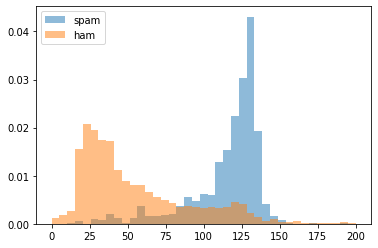

In [21]:
bins = np.linspace(0, 200, 40)
pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, normed=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

C:\Users\ma13293\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\ma13293\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


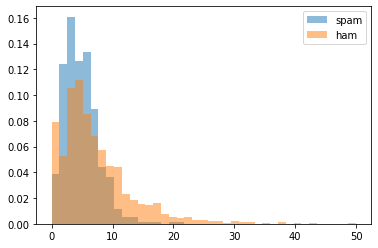

In [22]:
bins = np.linspace(0, 50, 40)
pyplot.hist(data[data['label']=='spam']['punct%'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5, normed=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

### <font color=blue>Transforming "punct%" feature</font>

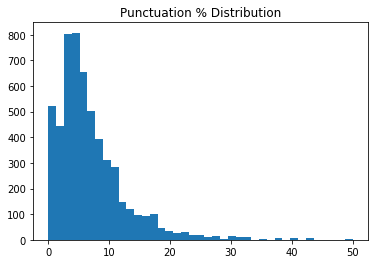

In [23]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data['punct%'], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

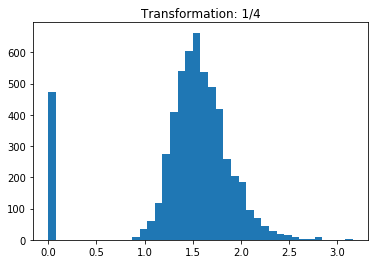

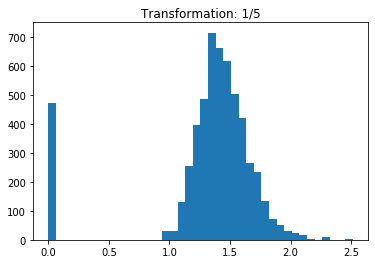

In [24]:
for i in [4,5]:
    pyplot.hist((data['punct%'])**(1/i), bins =40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()

### <font color=red>"i= 4" or "i = 5" yield a normal-like distribution! </font>

### <font color=blue>Building a basic Random Forest model</font>

In [26]:
data = pd.read_csv("SMSSpamCollection", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,24,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,116,6.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from sklearn.ensemble import RandomForestClassifier
print(dir(RandomForestClassifier))
print(RandomForestClassifier())

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0

In [28]:
from sklearn.model_selection import KFold, cross_val_score

In [29]:
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, data['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.97219731, 0.97396768, 0.97217235, 0.96499102, 0.96768402])

### <font color=blue>Random Forest on a holdout test set</font>

In [30]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [33]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.05988292641506694, 'body_len'),
 (0.038581865175508996, 7353),
 (0.035204634856872724, 1804),
 (0.02733419771856366, 2032),
 (0.025539355563076717, 3135),
 (0.021126229979550874, 7221),
 (0.020770629703334924, 7030),
 (0.020422518425326164, 5727),
 (0.020001530779072442, 4799),
 (0.019488626089820174, 6749)]

In [34]:
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')



In [35]:
print('Precision: {} / Recall: {} / fscore: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round(fscore, 3)              ,
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 1.0 / Recall: 0.642 / fscore: 0.782 / Accuracy: 0.952
